<a href="https://colab.research.google.com/github/01-vyom/Machine-Learning-Projects/blob/master/Kaggle/%20House%20Prices%3A%20Advanced%20Regression%20Techniques/Total_House_Prediction__Adam_Optimizer_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# first step is to import the libraries that are currently required
import pandas as pd
import matplotlib.pyplot as plt
# x_data = range(0,l_data.shape[0]
import seaborn as sns
#LotFrontage
#LotArea
#YearBuilt
#TotalBsmtsf
#GarageArea
#PoolArea
import math
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.python.data import Dataset
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 25
pd.options.display.float_format = '{:.5f}'.format

In [0]:
Ames_House_data = pd.read_csv("/content/drive/My Drive/House Price Prediction/train.csv")

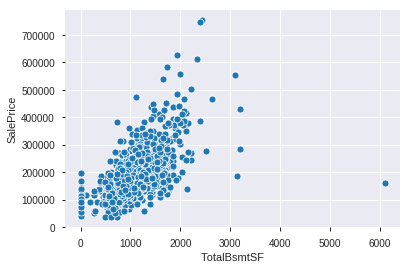

In [0]:
 sns.scatterplot(x=Ames_House_data["TotalBsmtSF"],y=Ames_House_data["SalePrice"])

## Non Numerical Features

In [0]:
#LotConfig
#LotShape
#Neighbor
#Foundation
#SaleCondition
chars1 = Ames_House_data[['LotConfig','Neighborhood','LotShape','Foundation','SaleCondition']]
chars1.describe()

,LotConfig,Neighborhood,LotShape,Foundation,SaleCondition
count,1460,1460,1460,1460,1460
unique,5,25,4,6,6
top,Inside,NAmes,Reg,PConc,Normal
freq,1052,225,925,647,1198


In [0]:
lot_config= np.unique(chars1['LotConfig'])
neigh=np.unique(chars1['Neighborhood'])
lotshape=np.unique(chars1['LotShape'])
found=np.unique(chars1['Foundation'])
salecond=np.unique(chars1['SaleCondition'])

In [0]:
# transform and map all the features


gen_le = LabelEncoder()
lot_config_labels = gen_le.fit_transform(chars1['LotConfig'])
chars1['lot_config_labels'] = lot_config_labels

gen_le1 = LabelEncoder()
neighborhood_labels = gen_le1.fit_transform(chars1['Neighborhood'])
chars1['neighborhood_labels'] = neighborhood_labels

gen_le2 = LabelEncoder()
lot_shape_labels = gen_le2.fit_transform(chars1['LotShape'])
chars1['lot_shape_labels'] = lot_shape_labels

gen_le3 = LabelEncoder()
found_labels = gen_le3.fit_transform(chars1['Foundation'])
chars1['found_labels'] = found_labels

gen_le4 = LabelEncoder()
sale_cond_labels = gen_le4.fit_transform(chars1['SaleCondition'])
chars1['sale_cond_labels'] = sale_cond_labels



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

In [0]:
# encode lot config labels using one-hot encoding scheme
gen_ohe = OneHotEncoder()
gen_feature_arr = gen_ohe.fit_transform(
                              chars1[['lot_config_labels']]).toarray()
lot_config_feature_labels = list(gen_le.classes_)
lot_config_features = pd.DataFrame(gen_feature_arr, 
                            columns=lot_config_feature_labels)

# encode neighborhood labels using one-hot encoding scheme
gen1_ohe = OneHotEncoder()
gen1_feature_arr = gen1_ohe.fit_transform(
                              chars1[['neighborhood_labels']]).toarray()
neighborhood_feature_labels = list(gen_le1.classes_)
neighborhood_features = pd.DataFrame(gen1_feature_arr, 
                            columns=neighborhood_feature_labels)

# encode lot shape labels using one-hot encoding scheme
gen2_ohe = OneHotEncoder()
gen2_feature_arr = gen2_ohe.fit_transform(
                              chars1[['lot_shape_labels']]).toarray()
lot_shape_feature_labels = list(gen_le2.classes_)
lot_shape_features = pd.DataFrame(gen2_feature_arr, 
                            columns=lot_shape_feature_labels)

# encode foundation labels using one-hot encoding scheme
gen3_ohe = OneHotEncoder()
gen3_feature_arr = gen3_ohe.fit_transform(
                              chars1[['found_labels']]).toarray()
found_feature_labels = list(gen_le3.classes_)
found_features = pd.DataFrame(gen3_feature_arr, 
                            columns=found_feature_labels)

# encode sale condition labels using one-hot encoding scheme
gen4_ohe = OneHotEncoder()
gen4_feature_arr = gen4_ohe.fit_transform(
                              chars1[['sale_cond_labels']]).toarray()
sale_cond_feature_labels = list(gen_le4.classes_)
sale_cond_features = pd.DataFrame(gen4_feature_arr, 
                            columns=sale_cond_feature_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [0]:
df = pd.concat([chars1,lot_config_features,neighborhood_features,lot_shape_features,found_features,sale_cond_features], axis=1)

In [0]:
df.describe()

,lot_config_labels,neighborhood_labels,lot_shape_labels,found_labels,sale_cond_labels,Corner,CulDSac,FR2,FR3,Inside,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,IR1,IR2,IR3,Reg,BrkTil,CBlock,PConc,Slab,Stone,Wood,Abnorml,AdjLand,Alloca,Family,Normal,Partial
count,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000
mean,3.01918,12.25137,1.94247,1.39658,3.77055,0.18014,0.06438,0.03219,0.00274,0.72055,0.01164,0.00137,0.01096,0.03973,0.01918,0.10274,0.03493,0.06849,0.05411,0.02534,0.01164,0.03356,0.15411,0.00616,0.05000,0.02808,0.05274,0.07740,0.01712,0.05068,0.04041,0.05890,0.01712,0.02603,0.00753,0.33151,0.02808,0.00685,0.63356,0.10000,0.43425,0.44315,0.01644,0.00411,0.00205,0.06918,0.00274,0.00822,0.01370,0.82055,0.08562
std,1.62263,6.01373,1.40916,0.72239,1.10085,0.38443,0.24552,0.17657,0.05229,0.44888,0.10731,0.03700,0.10415,0.19538,0.13720,0.30372,0.18367,0.25268,0.22631,0.15722,0.10731,0.18016,0.36118,0.07830,0.21802,0.16526,0.22359,0.26731,0.12978,0.21943,0.19699,0.23553,0.12978,0.15927,0.08650,0.47092,0.16526,0.08250,0.48200,0.30010,0.49583,0.49693,0.12720,0.06400,0.04530,0.25384,0.05229,0.09032,0.11628,0.38386,0.27989
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,2.00000,7.00000,0.00000,1.00000,4.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
50%,4.00000,12.00000,3.00000,1.00000,4.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
75%,4.00000,17.00000,3.00000,2.00000,4.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
max,4.00000,24.00000,3.00000,5.00000,5.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [0]:
Non_Num_data=df.drop(columns=['LotConfig','Neighborhood','LotShape','Foundation','SaleCondition','lot_config_labels','neighborhood_labels','lot_shape_labels','found_labels','sale_cond_labels'])

In [0]:
Non_Num_data.describe()

,Corner,CulDSac,FR2,FR3,Inside,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,IR1,IR2,IR3,Reg,BrkTil,CBlock,PConc,Slab,Stone,Wood,Abnorml,AdjLand,Alloca,Family,Normal,Partial
count,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000
mean,0.18014,0.06438,0.03219,0.00274,0.72055,0.01164,0.00137,0.01096,0.03973,0.01918,0.10274,0.03493,0.06849,0.05411,0.02534,0.01164,0.03356,0.15411,0.00616,0.05000,0.02808,0.05274,0.07740,0.01712,0.05068,0.04041,0.05890,0.01712,0.02603,0.00753,0.33151,0.02808,0.00685,0.63356,0.10000,0.43425,0.44315,0.01644,0.00411,0.00205,0.06918,0.00274,0.00822,0.01370,0.82055,0.08562
std,0.38443,0.24552,0.17657,0.05229,0.44888,0.10731,0.03700,0.10415,0.19538,0.13720,0.30372,0.18367,0.25268,0.22631,0.15722,0.10731,0.18016,0.36118,0.07830,0.21802,0.16526,0.22359,0.26731,0.12978,0.21943,0.19699,0.23553,0.12978,0.15927,0.08650,0.47092,0.16526,0.08250,0.48200,0.30010,0.49583,0.49693,0.12720,0.06400,0.04530,0.25384,0.05229,0.09032,0.11628,0.38386,0.27989
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
50%,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
75%,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
max,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [0]:
Non_Num_data.head()

,Corner,CulDSac,FR2,FR3,Inside,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,IR1,IR2,IR3,Reg,BrkTil,CBlock,PConc,Slab,Stone,Wood,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
1,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
2,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
3,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000


## Numerical Features

In [0]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
nums = Ames_House_data.select_dtypes(include=numerics)
nums.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00000,1460.00000,1201.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1452.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1379.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000
mean,730.50000,56.89726,70.04996,10516.82808,6.09932,5.57534,1971.26781,1984.86575,103.68526,443.63973,46.54932,567.24041,1057.42945,1162.62671,346.99247,5.84452,1515.46370,0.42534,0.05753,1.56507,0.38288,2.86644,1.04658,6.51781,0.61301,1978.50616,1.76712,472.98014,94.24452,46.66027,21.95411,3.40959,15.06096,2.75890,43.48904,6.32192,2007.81575,180921.19589
std,421.61001,42.30057,24.28475,9981.26493,1.38300,1.11280,30.20290,20.64541,181.06621,456.09809,161.31927,441.86696,438.70532,386.58774,436.52844,48.62308,525.48038,0.51891,0.23875,0.55092,0.50289,0.81578,0.22034,1.62539,0.64467,24.68972,0.74732,213.80484,125.33879,66.25603,61.11915,29.31733,55.75742,40.17731,496.12302,2.70363,1.32810,79442.50288
min,1.00000,20.00000,21.00000,1300.00000,1.00000,1.00000,1872.00000,1950.00000,0.00000,0.00000,0.00000,0.00000,0.00000,334.00000,0.00000,0.00000,334.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,1900.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,2006.00000,34900.00000
25%,365.75000,20.00000,59.00000,7553.50000,5.00000,5.00000,1954.00000,1967.00000,0.00000,0.00000,0.00000,223.00000,795.75000,882.00000,0.00000,0.00000,1129.50000,0.00000,0.00000,1.00000,0.00000,2.00000,1.00000,5.00000,0.00000,1961.00000,1.00000,334.50000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,5.00000,2007.00000,129975.00000
50%,730.50000,50.00000,69.00000,9478.50000,6.00000,5.00000,1973.00000,1994.00000,0.00000,383.50000,0.00000,477.50000,991.50000,1087.00000,0.00000,0.00000,1464.00000,0.00000,0.00000,2.00000,0.00000,3.00000,1.00000,6.00000,1.00000,1980.00000,2.00000,480.00000,0.00000,25.00000,0.00000,0.00000,0.00000,0.00000,0.00000,6.00000,2008.00000,163000.00000
75%,1095.25000,70.00000,80.00000,11601.50000,7.00000,6.00000,2000.00000,2004.00000,166.00000,712.25000,0.00000,808.00000,1298.25000,1391.25000,728.00000,0.00000,1776.75000,1.00000,0.00000,2.00000,1.00000,3.00000,1.00000,7.00000,1.00000,2002.00000,2.00000,576.00000,168.00000,68.00000,0.00000,0.00000,0.00000,0.00000,0.00000,8.00000,2009.00000,214000.00000
max,1460.00000,190.00000,313.00000,215245.00000,10.00000,9.00000,2010.00000,2010.00000,1600.00000,5644.00000,1474.00000,2336.00000,6110.00000,4692.00000,2065.00000,572.00000,5642.00000,3.00000,2.00000,3.00000,2.00000,8.00000,3.00000,14.00000,3.00000,2010.00000,4.00000,1418.00000,857.00000,547.00000,552.00000,508.00000,480.00000,738.00000,15500.00000,12.00000,2010.00000,755000.00000


In [0]:
nums=nums.drop(columns=['Id','MoSold','PoolArea'])
nums.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,YrSold,SalePrice
count,1460.00000,1201.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1452.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1379.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000
mean,56.89726,70.04996,10516.82808,6.09932,5.57534,1971.26781,1984.86575,103.68526,443.63973,46.54932,567.24041,1057.42945,1162.62671,346.99247,5.84452,1515.46370,0.42534,0.05753,1.56507,0.38288,2.86644,1.04658,6.51781,0.61301,1978.50616,1.76712,472.98014,94.24452,46.66027,21.95411,3.40959,15.06096,43.48904,2007.81575,180921.19589
std,42.30057,24.28475,9981.26493,1.38300,1.11280,30.20290,20.64541,181.06621,456.09809,161.31927,441.86696,438.70532,386.58774,436.52844,48.62308,525.48038,0.51891,0.23875,0.55092,0.50289,0.81578,0.22034,1.62539,0.64467,24.68972,0.74732,213.80484,125.33879,66.25603,61.11915,29.31733,55.75742,496.12302,1.32810,79442.50288
min,20.00000,21.00000,1300.00000,1.00000,1.00000,1872.00000,1950.00000,0.00000,0.00000,0.00000,0.00000,0.00000,334.00000,0.00000,0.00000,334.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,1900.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2006.00000,34900.00000
25%,20.00000,59.00000,7553.50000,5.00000,5.00000,1954.00000,1967.00000,0.00000,0.00000,0.00000,223.00000,795.75000,882.00000,0.00000,0.00000,1129.50000,0.00000,0.00000,1.00000,0.00000,2.00000,1.00000,5.00000,0.00000,1961.00000,1.00000,334.50000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2007.00000,129975.00000
50%,50.00000,69.00000,9478.50000,6.00000,5.00000,1973.00000,1994.00000,0.00000,383.50000,0.00000,477.50000,991.50000,1087.00000,0.00000,0.00000,1464.00000,0.00000,0.00000,2.00000,0.00000,3.00000,1.00000,6.00000,1.00000,1980.00000,2.00000,480.00000,0.00000,25.00000,0.00000,0.00000,0.00000,0.00000,2008.00000,163000.00000
75%,70.00000,80.00000,11601.50000,7.00000,6.00000,2000.00000,2004.00000,166.00000,712.25000,0.00000,808.00000,1298.25000,1391.25000,728.00000,0.00000,1776.75000,1.00000,0.00000,2.00000,1.00000,3.00000,1.00000,7.00000,1.00000,2002.00000,2.00000,576.00000,168.00000,68.00000,0.00000,0.00000,0.00000,0.00000,2009.00000,214000.00000
max,190.00000,313.00000,215245.00000,10.00000,9.00000,2010.00000,2010.00000,1600.00000,5644.00000,1474.00000,2336.00000,6110.00000,4692.00000,2065.00000,572.00000,5642.00000,3.00000,2.00000,3.00000,2.00000,8.00000,3.00000,14.00000,3.00000,2010.00000,4.00000,1418.00000,857.00000,547.00000,552.00000,508.00000,480.00000,15500.00000,2010.00000,755000.00000


In [0]:
nums['LotFrontage'].fillna(70,inplace=True)
nums['MasVnrArea'].fillna(103.7,inplace=True)
nums['GarageYrBlt'].fillna(1.8,inplace=True)

In [0]:
nums.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,YrSold,SalePrice
count,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000
mean,56.89726,70.04110,10516.82808,6.09932,5.57534,1971.26781,1984.86575,103.68534,443.63973,46.54932,567.24041,1057.42945,1162.62671,346.99247,5.84452,1515.46370,0.42534,0.05753,1.56507,0.38288,2.86644,1.04658,6.51781,0.61301,1868.83959,1.76712,472.98014,94.24452,46.66027,21.95411,3.40959,15.06096,43.48904,2007.81575,180921.19589
std,42.30057,22.02403,9981.26493,1.38300,1.11280,30.20290,20.64541,180.56911,456.09809,161.31927,441.86696,438.70532,386.58774,436.52844,48.62308,525.48038,0.51891,0.23875,0.55092,0.50289,0.81578,0.22034,1.62539,0.64467,453.28569,0.74732,213.80484,125.33879,66.25603,61.11915,29.31733,55.75742,496.12302,1.32810,79442.50288
min,20.00000,21.00000,1300.00000,1.00000,1.00000,1872.00000,1950.00000,0.00000,0.00000,0.00000,0.00000,0.00000,334.00000,0.00000,0.00000,334.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,1.80000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2006.00000,34900.00000
25%,20.00000,60.00000,7553.50000,5.00000,5.00000,1954.00000,1967.00000,0.00000,0.00000,0.00000,223.00000,795.75000,882.00000,0.00000,0.00000,1129.50000,0.00000,0.00000,1.00000,0.00000,2.00000,1.00000,5.00000,0.00000,1958.00000,1.00000,334.50000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2007.00000,129975.00000
50%,50.00000,70.00000,9478.50000,6.00000,5.00000,1973.00000,1994.00000,0.00000,383.50000,0.00000,477.50000,991.50000,1087.00000,0.00000,0.00000,1464.00000,0.00000,0.00000,2.00000,0.00000,3.00000,1.00000,6.00000,1.00000,1977.00000,2.00000,480.00000,0.00000,25.00000,0.00000,0.00000,0.00000,0.00000,2008.00000,163000.00000
75%,70.00000,79.00000,11601.50000,7.00000,6.00000,2000.00000,2004.00000,164.25000,712.25000,0.00000,808.00000,1298.25000,1391.25000,728.00000,0.00000,1776.75000,1.00000,0.00000,2.00000,1.00000,3.00000,1.00000,7.00000,1.00000,2001.00000,2.00000,576.00000,168.00000,68.00000,0.00000,0.00000,0.00000,0.00000,2009.00000,214000.00000
max,190.00000,313.00000,215245.00000,10.00000,9.00000,2010.00000,2010.00000,1600.00000,5644.00000,1474.00000,2336.00000,6110.00000,4692.00000,2065.00000,572.00000,5642.00000,3.00000,2.00000,3.00000,2.00000,8.00000,3.00000,14.00000,3.00000,2010.00000,4.00000,1418.00000,857.00000,547.00000,552.00000,508.00000,480.00000,15500.00000,2010.00000,755000.00000


In [0]:
# mul=nums[["YearBuilt"]].multiply(nums["GarageYrBlt"],axis=0)
# nums[["YearBuilt_GarageYrBlt"]] = mul[["YearBuilt"]]

In [0]:
def preprocess_features(l_data):
  temp = l_data.copy()
  temp1=(temp-temp.min())/(temp.max()-temp.min())
  mul =temp1[["YearBuilt"]].multiply(temp1["GarageYrBlt"],axis=0)
  temp1[["YearBuilt_GarageYrBlt"]] = mul[["YearBuilt"]]
  mul =temp1[["TotalBsmtSF"]].multiply(temp1["1stFlrSF"],axis=0)
  temp1[["TotalBsmtSF_1stFlrSF"]] = mul[["TotalBsmtSF"]]
  mul =temp1[["GarageArea"]].multiply(temp1["GarageYrBlt"],axis=0)
  temp1[["GarageArea_GarageCars"]] = mul[["GarageArea"]]
  mul =temp1[["GrLivArea"]].multiply(temp1["TotRmsAbvGrd"],axis=0)
  temp1[["GrLivArea_TotRmsAbvGrd"]] = mul[["GrLivArea"]]
  # temp1[["TotalBsmtSF_1stFlrSF"]] = temp1[["TotalBsmtSF"]] * temp1[["1stFlrSF"]];
  # temp1[["GarageArea_GarageCars"]] = temp1[["GarageArea"]] * temp1[["GarageYrBlt"]];
  # temp1[["GrLivArea_TotRmsAbvGrd"]] = temp1[["GrLivArea"]] * temp1[["TotRmsAbvGrd"]];
  processed_features = temp1.copy()
  processed_features[["OverallQual"]]=np.power(processed_features[["OverallQual"]],1)
  processed_features[["GrLivArea"]]=np.power(processed_features[["GrLivArea"]],0.58)
  processed_features[["GarageArea"]] =np.power(processed_features[["GarageArea"]],0.86)
  processed_features[["TotalBsmtSF"]] =np.power(processed_features[["TotalBsmtSF"]],0.54)
  processed_features[["1stFlrSF"]] = np.power(processed_features[["1stFlrSF"]],0.54)
  processed_features[["YearBuilt"]] =np.power(processed_features[["YearBuilt"]],2.5)
  processed_features[["MasVnrArea"]] =np.power(processed_features[["MasVnrArea"]],0.2)
  processed_features=processed_features.drop(columns=["GarageYrBlt"])
  return processed_features
def preprocess_target(l_data):
  out_target = l_data[["SalePrice"]]/100
  return out_target

data_target = preprocess_target(nums)
nums=nums.drop(columns=['SalePrice'])
Num_data = preprocess_features(nums)
Num_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,YrSold,YearBuilt_GarageYrBlt,TotalBsmtSF_1stFlrSF,GarageArea_GarageCars,GrLivArea_TotRmsAbvGrd
count,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000
mean,0.21704,0.16795,0.04308,0.56659,0.57192,0.51215,0.58110,0.27033,0.07860,0.03158,0.24283,0.37723,0.39755,0.16804,0.01022,0.40885,0.14178,0.02877,0.52169,0.19144,0.35830,0.34886,0.37648,0.20434,0.44178,0.38278,0.10997,0.08530,0.03977,0.00671,0.03138,0.00281,0.45394,0.68220,0.03812,0.32918,0.09486
std,0.24883,0.07542,0.04665,0.15367,0.13910,0.30715,0.34409,0.33143,0.08081,0.10944,0.18916,0.09625,0.09961,0.21139,0.08501,0.10433,0.17297,0.11938,0.18364,0.25144,0.10197,0.07345,0.13545,0.21489,0.18683,0.15608,0.14625,0.12113,0.11072,0.05771,0.11616,0.03201,0.33202,0.26752,0.04146,0.15060,0.07755
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.13356,0.02923,0.44444,0.50000,0.27217,0.28333,0.00000,0.00000,0.00000,0.09546,0.33263,0.32638,0.00000,0.00000,0.33259,0.00000,0.00000,0.33333,0.00000,0.25000,0.33333,0.25000,0.00000,0.25000,0.28876,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.25000,0.55565,0.01637,0.22764,0.04436
50%,0.17647,0.16781,0.03823,0.55556,0.50000,0.45825,0.73333,0.00000,0.06795,0.00000,0.20441,0.37457,0.38748,0.00000,0.00000,0.40769,0.00000,0.00000,0.66667,0.00000,0.37500,0.33333,0.33333,0.33333,0.50000,0.39394,0.00000,0.04570,0.00000,0.00000,0.00000,0.00000,0.50000,0.71093,0.02723,0.33238,0.07358
75%,0.29412,0.19863,0.04815,0.66667,0.62500,0.82857,0.90000,0.63427,0.12620,0.00000,0.34589,0.43326,0.46542,0.35254,0.00000,0.46975,0.33333,0.00000,0.66667,0.50000,0.37500,0.33333,0.41667,0.33333,0.50000,0.46081,0.19603,0.12431,0.00000,0.00000,0.00000,0.00000,0.75000,0.92292,0.04966,0.40322,0.11949
max,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.99900,0.83333


## Total Features

In [0]:
#data_feature = Num_data

In [0]:
data_feature = pd.concat([Non_Num_data,Num_data],axis=1)

In [0]:
data_feature.describe()

,Corner,CulDSac,FR2,FR3,Inside,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,IR1,IR2,IR3,Reg,BrkTil,CBlock,PConc,Slab,Stone,Wood,...,Family,Normal,Partial,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,YrSold,YearBuilt_GarageYrBlt,TotalBsmtSF_1stFlrSF,GarageArea_GarageCars,GrLivArea_TotRmsAbvGrd
count,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,...,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000
mean,0.18014,0.06438,0.03219,0.00274,0.72055,0.01164,0.00137,0.01096,0.03973,0.01918,0.10274,0.03493,0.06849,0.05411,0.02534,0.01164,0.03356,0.15411,0.00616,0.05000,0.02808,0.05274,0.07740,0.01712,0.05068,0.04041,0.05890,0.01712,0.02603,0.00753,0.33151,0.02808,0.00685,0.63356,0.10000,0.43425,0.44315,0.01644,0.00411,0.00205,...,0.01370,0.82055,0.08562,0.21704,0.16795,0.04308,0.56659,0.57192,0.51215,0.58110,0.27033,0.07860,0.03158,0.24283,0.37723,0.39755,0.16804,0.01022,0.40885,0.14178,0.02877,0.52169,0.19144,0.35830,0.34886,0.37648,0.20434,0.44178,0.38278,0.10997,0.08530,0.03977,0.00671,0.03138,0.00281,0.45394,0.68220,0.03812,0.32918,0.09486
std,0.38443,0.24552,0.17657,0.05229,0.44888,0.10731,0.03700,0.10415,0.19538,0.13720,0.30372,0.18367,0.25268,0.22631,0.15722,0.10731,0.18016,0.36118,0.07830,0.21802,0.16526,0.22359,0.26731,0.12978,0.21943,0.19699,0.23553,0.12978,0.15927,0.08650,0.47092,0.16526,0.08250,0.48200,0.30010,0.49583,0.49693,0.12720,0.06400,0.04530,...,0.11628,0.38386,0.27989,0.24883,0.07542,0.04665,0.15367,0.13910,0.30715,0.34409,0.33143,0.08081,0.10944,0.18916,0.09625,0.09961,0.21139,0.08501,0.10433,0.17297,0.11938,0.18364,0.25144,0.10197,0.07345,0.13545,0.21489,0.18683,0.15608,0.14625,0.12113,0.11072,0.05771,0.11616,0.03201,0.33202,0.26752,0.04146,0.15060,0.07755
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.13356,0.02923,0.44444,0.50000,0.27217,0.28333,0.000

In [0]:
data_feature.head()

,Corner,CulDSac,FR2,FR3,Inside,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,IR1,IR2,IR3,Reg,BrkTil,CBlock,PConc,Slab,Stone,Wood,...,Family,Normal,Partial,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,YrSold,YearBuilt_GarageYrBlt,TotalBsmtSF_1stFlrSF,GarageArea_GarageCars,GrLivArea_TotRmsAbvGrd
0,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,0.00000,0.23529,0.15068,0.03342,0.66667,0.50000,0.87797,0.88333,0.65709,0.12509,0.00000,0.06421,0.34600,0.31793,0.41356,0.00000,0.45702,0.33333,0.00000,0.66667,0.50000,0.37500,0.33333,0.50000,0.00000,0.50000,0.44148,0.00000,0.11152,0.00000,0.00000,0.00000,0.00000,0.50000,0.94597,0.01678,0.38511,0.12962
1,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.20205,0.03880,0.55556,0.87500,0.49304,0.43333,0.00000,0.17328,0.00000,0.12158,0.42669,0.43377,0.00000,0.00000,0.36368,0.00000,0.50000,0.66667,0.00000,0.37500,0.33333,0.33333,0.33333,0.50000,0.37978,0.34772,0.00000,0.00000,0.00000,0.00000,0.00000,0.25000,0.74086,0.04398,0.31891,0.05828
2,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,0.00000,0.23529,0.16096,0.04651,0.66667,0.50000,0.84484,0.86667,0.63253,0.08611,0.00000,0.18579,0.35974,0.33842,0.41937,0.00000,0.47150,0.33333,0.00000,0.66667,0.50000,0.37500,0.33333,0.33333,0.33333,0.50000,0.48274,0.00000,0.07678,0.00000,0.00000,0.00000,0.00000,0.50000,0.93059,0.02025,0.42685,0.09118
3,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.29412,0.13356,0.03856,0.66667,0.50000,0.05420,0.33333,0.00000,0.03827,0.00000,0.23116,0.32355,0.35100,0.36610,0.00000,0.45837,0.33333,0.00000,0.33333,0.00000,0.37500,0.33333,0.41667,0.33333,0.75000,0.50587,0.00000,0.06399,0.49275,0.00000,0.00000,0.00000,0.00000,0.30973,0.01780,0.45004,0.10856
4,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,0.00000,0.23529,0.21575,0.06058,0.77778,0.50000,0.82857,0.83333,0.73789,0.11605,0.00000,0.20976,0.40485,0.40333,0.50993,0.00000,0.54500,0.33333,0.00000,0.66667,0.50000,0.50000,0.33333,0.58333,0.33333,0.75000,0.63483,0.22404,0.15356,0.00000,0.00000,0.00000,0.00000,0.50000,0.92292,0.03487,0.58663,0.20485


In [0]:
#OverallQual    0.62565
#GrLivArea      0.50215
#GarageCars     0.41012
#GarageArea     0.38867
#TotalBsmtSF    0.37648
#1stFlrSF       0.36706
#FullBath       0.31434
#TotRmsAbvGrd   0.28486
#YearBuilt      0.27342
#YearRemodAdd   0.25715
#PConc          0.24774
#MasVnrArea     0.22585

# data_feature[["OverallQual"]]=np.power(data_feature[["OverallQual"]],1)
# data_feature[["GrLivArea"]]=np.power(data_feature[["GrLivArea"]],0.58)
# data_feature[["GarageArea"]] =np.power(data_feature[["GarageArea"]],0.86)
# data_feature[["TotalBsmtSF"]] =np.power(data_feature[["TotalBsmtSF"]],0.54)
# data_feature[["1stFlrSF"]] = np.power(data_feature[["1stFlrSF"]],0.54)
# data_feature[["YearBuilt"]] =np.power(data_feature[["YearBuilt"]],2.5)
# data_feature[["MasVnrArea"]] =np.power(data_feature[["MasVnrArea"]],0.2)

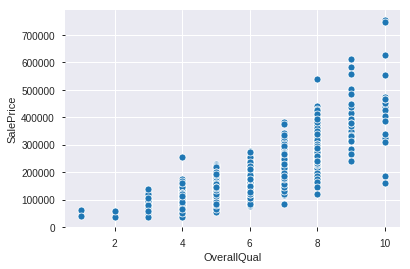

In [0]:
sns.scatterplot(x=Ames_House_data["OverallQual"],y=Ames_House_data["SalePrice"])


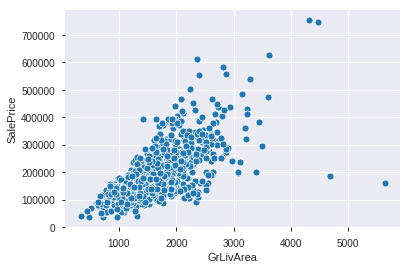

In [0]:
 sns.scatterplot(x=Ames_House_data["GrLivArea"],y=Ames_House_data["SalePrice"])

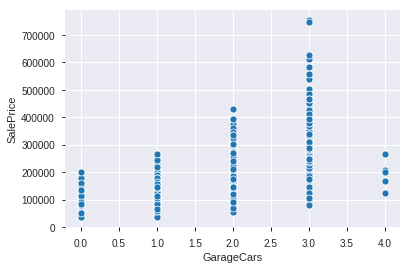

In [0]:
 sns.scatterplot(x=Ames_House_data["GarageCars"],y=Ames_House_data["SalePrice"])

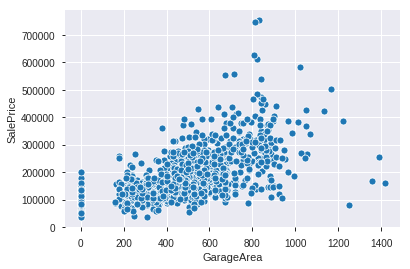

In [0]:
 sns.scatterplot(x=Ames_House_data["GarageArea"],y=Ames_House_data["SalePrice"])

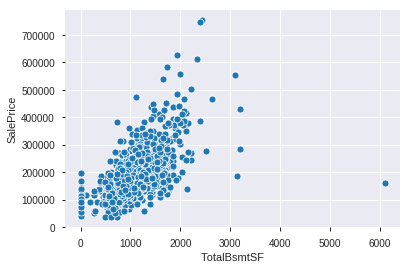

In [0]:
 sns.scatterplot(x=Ames_House_data["TotalBsmtSF"],y=Ames_House_data["SalePrice"])

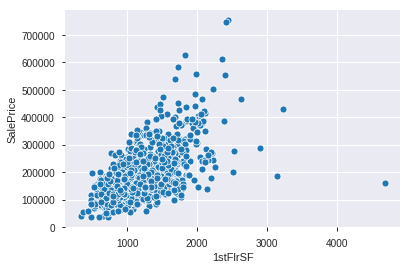

In [0]:
 sns.scatterplot(x=Ames_House_data["1stFlrSF"],y=Ames_House_data["SalePrice"])

In [0]:
train = Ames_House_data[["SalePrice"]]
train=pd.concat([train,data_feature],axis=1)
(train.corr()**2)["SalePrice"].sort_values(ascending = False)[1:]

OverallQual              0.62565
GrLivArea                0.50030
GarageCars               0.41012
GrLivArea_TotRmsAbvGrd   0.40172
GarageArea_GarageCars    0.39632
GarageArea               0.37630
1stFlrSF                 0.36043
YearBuilt                0.32993
TotalBsmtSF              0.32045
FullBath                 0.31434
YearBuilt_GarageYrBlt    0.28680
TotRmsAbvGrd             0.28486
                           ...  
MiscVal                  0.00045
Blueste                  0.00041
Blmngtn                  0.00036
FR3                      0.00033
BsmtHalfBath             0.00028
Alloca                   0.00024
SawyerW                  0.00021
Stone                    0.00015
BsmtFinSF2               0.00013
FR2                      0.00005
Corner                   0.00002
Wood                     0.00001
Name: SalePrice, Length: 83, dtype: float64

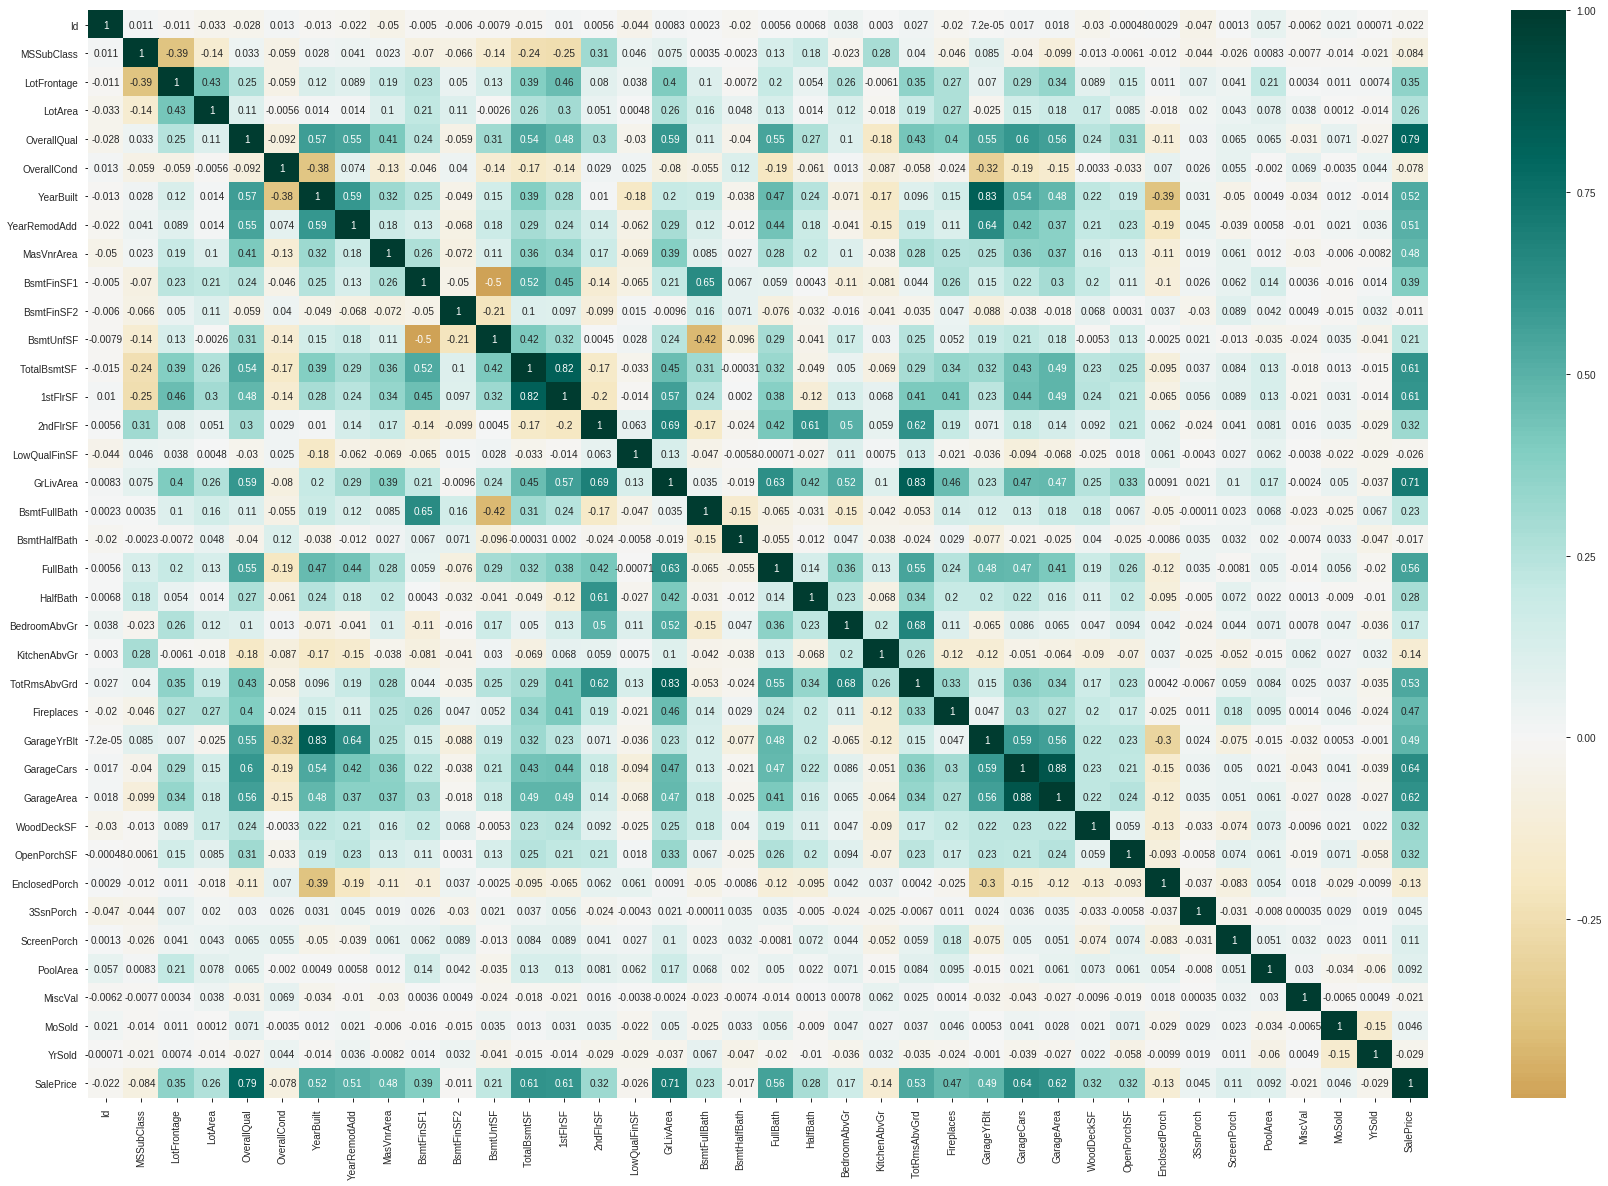

In [0]:
plt.subplots(figsize = (30,20));
sns.heatmap(Ames_House_data.corr(), cmap="BrBG", annot=True, center = 0, );

In [0]:
def my_in_fn(features,targets,batch_size = 1,shuffle = True, num_epochs = None):
  features = {key:np.array(value) for key,value in dict(features).items()}
  ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
  ds = ds.batch(batch_size).repeat(num_epochs)
  features, labels = ds.make_one_shot_iterator().get_next()
  return features, labels
def construct_feature_columns(input_features):
  """Construct the TensorFlow Feature Columns.

  Args:
    input_features: The names of the numerical input features to use.
  Returns:
    A set of feature columns
  """ 
  return set([tf.feature_column.numeric_column(my_feature) for my_feature in input_features])




  

In [0]:
#Linear Regression
def train_model(learning_rate,
                steps,
  batch_size,
  training_examples,
  training_targets):
  
  periods = 10
  steps_per_period = steps / periods
  
  # Create a linear regressor object.
  my_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate,beta1=0.9,
    beta2=0.999,
    epsilon=1e-08)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=construct_feature_columns(training_examples),
      optimizer=my_optimizer
  )
  
  # 1. Create input functions.
  training_input_fn = lambda: my_in_fn(training_examples,training_targets["SalePrice"],batch_size=batch_size)
  predict_training_input_fn = lambda: my_in_fn(
      training_examples, 
      training_targets["SalePrice"],
      num_epochs=1,
      shuffle=False)
  
  
  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("RMSE (on training data):")
  training_rmse = []
  
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period,
    )
    # 2. Take a break and compute predictions.
    training_predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
    training_predictions = np.array([item['predictions'][0] for item in training_predictions])
    
    # Compute training and validation loss.
    training_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(training_predictions, training_targets))
    
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, training_root_mean_squared_error))
    # Add the loss metrics from this period to our list.
    training_rmse.append(training_root_mean_squared_error)
    
  print("Model training finished.")

  # Output a graph of loss metrics over periods.
  plt.ylabel("RMSE")
  plt.xlabel("Periods")
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(training_rmse, label="training")
  
  plt.legend()

  return linear_regressor

In [0]:
#DNN Regressor
def train_model(learning_rate,
  steps,
    batch_size,
    hidden_units,
    training_examples,
    training_targets,):
  
  periods = 10
  steps_per_period = steps / periods
  
  # Create a linear regressor object.
  my_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate,beta1=0.9,
    beta2=0.999,
    epsilon=1e-08)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  linear_regressor = tf.estimator.DNNRegressor(
      feature_columns=construct_feature_columns(training_examples),
      optimizer=my_optimizer,
      hidden_units=hidden_units
  )
  
  # 1. Create input functions.
  training_input_fn = lambda: my_in_fn(training_examples,training_targets["SalePrice"],batch_size=batch_size)
  predict_training_input_fn = lambda: my_in_fn(
      training_examples, 
      training_targets["SalePrice"],
      num_epochs=1,
      shuffle=False)
  
  
  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("RMSE (on training data):")
  training_rmse = []
  
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period,
    )
    # 2. Take a break and compute predictions.
    training_predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
    training_predictions = np.array([item['predictions'][0] for item in training_predictions])
    
    # Compute training and validation loss.
    training_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(training_predictions, training_targets))
    
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, training_root_mean_squared_error))
    # Add the loss metrics from this period to our list.
    training_rmse.append(training_root_mean_squared_error)
    
  print("Model training finished.")

  # Output a graph of loss metrics over periods.
  plt.ylabel("RMSE")
  plt.xlabel("Periods")
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(training_rmse, label="training")
  
  plt.legend()

  return linear_regressor

In [0]:
#DNN Regressor
linear_regressor = train_model(
    learning_rate=0.01,
    steps=4000,
    batch_size=70,
    hidden_units=[10, 8,7],
    training_examples=data_feature,
    training_targets=data_target
    )

Training model...
RMSE (on training data):


KeyboardInterrupt: ignored

In [0]:
#DNN Regressor
linear_regressor = train_model(
    learning_rate=0.003,
    steps=4500,
    batch_size=70,
    hidden_units=[12,10,6],
    training_examples=data_feature,
    training_targets=data_target
    )

Training model...
RMSE (on training data):
  period 00 : 1002.42
  period 01 : 554.41
  period 02 : 499.04
  period 03 : 462.18
  period 04 : 436.62
  period 05 : 418.06
  period 06 : 404.14
  period 07 : 393.66
  period 08 : 385.96
  period 09 : 379.99
Model training finished.


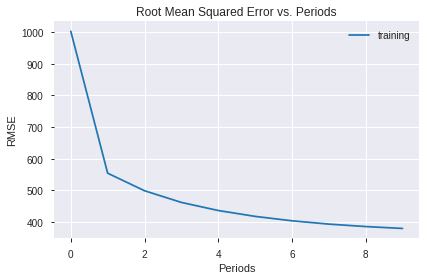

In [0]:
#with one hot and poly and removing one feature
linear_regressor = train_model(
    learning_rate=1.5,
    steps=500,
    batch_size=5,
    training_examples=data_feature,
    training_targets=data_target
    )

In [0]:
#with one hot and poly
linear_regressor = train_model(
    learning_rate=1.5,
    steps=500,
    batch_size=5,
    training_examples=data_feature,
    training_targets=data_target
    )

In [0]:
#with one hot and simple no poly
linear_regressor = train_model(
    learning_rate=1.5,
    steps=500,
    batch_size=5,
    training_examples=data_feature,
    training_targets=data_target
    )

In [0]:
Ames_House_test_data = pd.read_csv('/content/drive/My Drive/House Price Prediction/test.csv')

## Test Non Numeric Features

In [0]:
#LotConfig
#LotShape
#Neighbor
#Foundation
#SaleCondition
chars1t = Ames_House_test_data[['LotConfig','Neighborhood','LotShape','Foundation','SaleCondition']]
chars1t.describe()

In [0]:
lot_configt= np.unique(chars1['LotConfig'])
neight=np.unique(chars1['Neighborhood'])
lotshapet=np.unique(chars1['LotShape'])
foundt=np.unique(chars1['Foundation'])
salecondt=np.unique(chars1['SaleCondition'])

In [0]:
# transform and map all the features


gen_let = LabelEncoder()
lot_config_labelst = gen_let.fit_transform(chars1t['LotConfig'])
chars1t['lot_config_labels'] = lot_config_labelst

gen_le1t = LabelEncoder()
neighborhood_labelst = gen_le1t.fit_transform(chars1t['Neighborhood'])
chars1t['neighborhood_labels'] = neighborhood_labelst

gen_le2t = LabelEncoder()
lot_shape_labelst = gen_le2t.fit_transform(chars1t['LotShape'])
chars1t['lot_shape_labels'] = lot_shape_labelst

gen_le3t = LabelEncoder()
found_labelst = gen_le3t.fit_transform(chars1t['Foundation'])
chars1t['found_labels'] = found_labelst

gen_le4t = LabelEncoder()
sale_cond_labelst = gen_le4t.fit_transform(chars1t['SaleCondition'])
chars1t['sale_cond_labels'] = sale_cond_labelst



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

In [0]:
# encode lot config labels using one-hot encoding scheme
gen_ohet = OneHotEncoder()
gen_feature_arrt = gen_ohet.fit_transform(
                              chars1t[['lot_config_labels']]).toarray()
lot_config_feature_labelst = list(gen_let.classes_)
lot_config_featurest = pd.DataFrame(gen_feature_arrt, 
                            columns=lot_config_feature_labelst)

# encode neighborhood labels using one-hot encoding scheme
gen1_ohet = OneHotEncoder()
gen1_feature_arrt = gen1_ohet.fit_transform(
                              chars1t[['neighborhood_labels']]).toarray()
neighborhood_feature_labelst = list(gen_le1t.classes_)
neighborhood_featurest = pd.DataFrame(gen1_feature_arrt, 
                            columns=neighborhood_feature_labelst)

# encode lot shape labels using one-hot encoding scheme
gen2_ohet = OneHotEncoder()
gen2_feature_arrt = gen2_ohet.fit_transform(
                              chars1t[['lot_shape_labels']]).toarray()
lot_shape_feature_labelst = list(gen_le2t.classes_)
lot_shape_featurest = pd.DataFrame(gen2_feature_arrt, 
                            columns=lot_shape_feature_labelst)

# encode foundation labels using one-hot encoding scheme
gen3_ohet = OneHotEncoder()
gen3_feature_arrt = gen3_ohet.fit_transform(
                              chars1t[['found_labels']]).toarray()
found_feature_labelst = list(gen_le3t.classes_)
found_featurest = pd.DataFrame(gen3_feature_arrt, 
                            columns=found_feature_labelst)

# encode sale condition labels using one-hot encoding scheme
gen4_ohet = OneHotEncoder()
gen4_feature_arrt = gen4_ohet.fit_transform(
                              chars1t[['sale_cond_labels']]).toarray()
sale_cond_feature_labelst= list(gen_le4t.classes_)
sale_cond_featurest = pd.DataFrame(gen4_feature_arrt, 
                            columns=sale_cond_feature_labelst)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [0]:
dft = pd.concat([chars1t,lot_config_featurest,neighborhood_featurest,lot_shape_featurest,found_featurest,sale_cond_featurest], axis=1)

In [0]:
dft.describe()

,lot_config_labels,neighborhood_labels,lot_shape_labels,found_labels,sale_cond_labels,Corner,CulDSac,FR2,FR3,Inside,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,IR1,IR2,IR3,Reg,BrkTil,CBlock,PConc,Slab,Stone,Wood,Abnorml,AdjLand,Alloca,Family,Normal,Partial
count,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000
mean,3.09253,12.62303,1.95271,1.38999,3.78753,0.16998,0.05620,0.02605,0.00685,0.74092,0.00754,0.00548,0.00960,0.03427,0.01097,0.08019,0.03564,0.06443,0.05894,0.03838,0.01371,0.04455,0.14942,0.00960,0.03975,0.02056,0.06100,0.08636,0.01576,0.05278,0.04524,0.06580,0.01782,0.02330,0.00891,0.33173,0.02399,0.00411,0.64016,0.11309,0.41193,0.45305,0.01714,0.00343,0.00137,0.06100,0.00548,0.00822,0.01782,0.82522,0.08225
std,1.58580,5.89789,1.41075,0.73194,1.05544,0.37574,0.23039,0.15932,0.08253,0.43828,0.08653,0.07387,0.09752,0.18198,0.10418,0.27168,0.18546,0.24560,0.23560,0.19218,0.11632,0.20639,0.35662,0.09752,0.19545,0.14196,0.23941,0.28099,0.12460,0.22366,0.20789,0.24801,0.13234,0.15092,0.09400,0.47100,0.15307,0.06402,0.48012,0.31681,0.49235,0.49796,0.12982,0.05846,0.03701,0.23941,0.07387,0.09035,0.13234,0.37991,0.27484
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,2.00000,8.00000,0.00000,1.00000,4.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
50%,4.00000,12.00000,3.00000,1.00000,4.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
75%,4.00000,17.00000,3.00000,2.00000,4.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
max,4.00000,24.00000,3.00000,5.00000,5.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [0]:
Non_Num_data_t=dft.drop(columns=['LotConfig','Neighborhood','LotShape','Foundation','SaleCondition','lot_config_labels','neighborhood_labels','lot_shape_labels','found_labels','sale_cond_labels'])

In [0]:
Non_Num_data_t.describe()

,Corner,CulDSac,FR2,FR3,Inside,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,IR1,IR2,IR3,Reg,BrkTil,CBlock,PConc,Slab,Stone,Wood,Abnorml,AdjLand,Alloca,Family,Normal,Partial
count,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000
mean,0.16998,0.05620,0.02605,0.00685,0.74092,0.00754,0.00548,0.00960,0.03427,0.01097,0.08019,0.03564,0.06443,0.05894,0.03838,0.01371,0.04455,0.14942,0.00960,0.03975,0.02056,0.06100,0.08636,0.01576,0.05278,0.04524,0.06580,0.01782,0.02330,0.00891,0.33173,0.02399,0.00411,0.64016,0.11309,0.41193,0.45305,0.01714,0.00343,0.00137,0.06100,0.00548,0.00822,0.01782,0.82522,0.08225
std,0.37574,0.23039,0.15932,0.08253,0.43828,0.08653,0.07387,0.09752,0.18198,0.10418,0.27168,0.18546,0.24560,0.23560,0.19218,0.11632,0.20639,0.35662,0.09752,0.19545,0.14196,0.23941,0.28099,0.12460,0.22366,0.20789,0.24801,0.13234,0.15092,0.09400,0.47100,0.15307,0.06402,0.48012,0.31681,0.49235,0.49796,0.12982,0.05846,0.03701,0.23941,0.07387,0.09035,0.13234,0.37991,0.27484
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
50%,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
75%,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
max,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [0]:
Non_Num_data.head()

,Corner,CulDSac,FR2,FR3,Inside,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,IR1,IR2,IR3,Reg,BrkTil,CBlock,PConc,Slab,Stone,Wood,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
1,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
2,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
3,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000


## Test Numeric Features

In [0]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numst = Ames_House_test_data.select_dtypes(include=numerics)

In [0]:
numst=numst.drop(columns=['Id','MoSold','PoolArea'])
numst.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,YrSold
count,1459.00000,1232.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1444.00000,1458.00000,1458.00000,1458.00000,1458.00000,1459.00000,1459.00000,1459.00000,1459.00000,1457.00000,1457.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1381.00000,1458.00000,1458.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000
mean,57.37834,68.58036,9819.16107,6.07882,5.55380,1971.35778,1983.66278,100.70914,439.20370,52.61934,554.29492,1046.11797,1156.53461,325.96779,3.54352,1486.04592,0.43445,0.06520,1.57094,0.37766,2.85401,1.04249,6.38520,0.58122,1977.72122,1.76612,472.76886,93.17478,48.31391,24.24332,1.79438,17.06443,58.16792,2007.76971
std,42.74688,22.37684,4955.51733,1.43681,1.11374,30.39007,21.13047,177.62590,455.26804,176.75393,437.26049,442.89862,398.16582,420.61023,44.04325,485.56610,0.53065,0.25247,0.55519,0.50302,0.82979,0.20847,1.50889,0.64742,26.43117,0.77595,217.04861,127.74488,68.88336,67.22777,20.20784,56.60976,630.80698,1.30174
min,20.00000,21.00000,1470.00000,1.00000,1.00000,1879.00000,1950.00000,0.00000,0.00000,0.00000,0.00000,0.00000,407.00000,0.00000,0.00000,407.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3.00000,0.00000,1895.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2006.00000
25%,20.00000,58.00000,7391.00000,5.00000,5.00000,1953.00000,1963.00000,0.00000,0.00000,0.00000,219.25000,784.00000,873.50000,0.00000,0.00000,1117.50000,0.00000,0.00000,1.00000,0.00000,2.00000,1.00000,5.00000,0.00000,1959.00000,1.00000,318.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2007.00000
50%,50.00000,67.00000,9399.00000,6.00000,5.00000,1973.00000,1992.00000,0.00000,350.50000,0.00000,460.00000,988.00000,1079.00000,0.00000,0.00000,1432.00000,0.00000,0.00000,2.00000,0.00000,3.00000,1.00000,6.00000,0.00000,1979.00000,2.00000,480.00000,0.00000,28.00000,0.00000,0.00000,0.00000,0.00000,2008.00000
75%,70.00000,80.00000,11517.50000,7.00000,6.00000,2001.00000,2004.00000,164.00000,753.50000,0.00000,797.75000,1305.00000,1382.50000,676.00000,0.00000,1721.00000,1.00000,0.00000,2.00000,1.00000,3.00000,1.00000,7.00000,1.00000,2002.00000,2.00000,576.00000,168.00000,72.00000,0.00000,0.00000,0.00000,0.00000,2009.00000
max,190.00000,200.00000,56600.00000,10.00000,9.00000,2010.00000,2010.00000,1290.00000,4010.00000,1526.00000,2140.00000,5095.00000,5095.00000,1862.00000,1064.00000,5095.00000,3.00000,2.00000,4.00000,2.00000,6.00000,2.00000,15.00000,4.00000,2207.00000,5.00000,1488.00000,1424.00000,742.00000,1012.00000,360.00000,576.00000,17000.00000,2010.00000


In [0]:
numst['LotFrontage'].fillna(68.6,inplace=True)
numst['MasVnrArea'].fillna(100.7,inplace=True)
numst['GarageYrBlt'].fillna(1977.7,inplace=True)#BsmtFinSF2
numst['BsmtFinSF1'].fillna(439.2,inplace=True)#
numst['BsmtFinSF2'].fillna(52.6,inplace=True)#BsmtUnfSF
numst['BsmtUnfSF'].fillna(554.3,inplace=True)#BsmtUnfSF
numst['TotalBsmtSF'].fillna(1046.1,inplace=True)#BsmtUnfSF
numst['BsmtFullBath'].fillna(0.4,inplace=True)#BsmtUnfSF
numst['BsmtHalfBath'].fillna(0.1,inplace=True)#BsmtUnfSF
numst['GarageCars'].fillna(1.8,inplace=True)#BsmtUnfSF
numst['GarageArea'].fillna(472.8,inplace=True)#BsmtUnfSF

In [0]:
def my_input_fn1(features, batch_size=1, shuffle=True, num_epochs=None):  
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(10000)
    # Return the next batch of data.
    features= ds.make_one_shot_iterator().get_next()
    return features

In [0]:
Num_data_t= preprocess_features(numst)

## Total Test Features

In [0]:
data_feature_t = pd.concat([Non_Num_data_t,Num_data_t],axis=1)

In [0]:
data_feature_t.describe()

,Corner,CulDSac,FR2,FR3,Inside,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,IR1,IR2,IR3,Reg,BrkTil,CBlock,PConc,Slab,Stone,Wood,...,Family,Normal,Partial,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,YrSold,YearBuilt_GarageYrBlt,TotalBsmtSF_1stFlrSF,GarageArea_GarageCars,GrLivArea_TotRmsAbvGrd
count,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,...,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000,1459.00000
mean,0.16998,0.05620,0.02605,0.00685,0.74092,0.00754,0.00548,0.00960,0.03427,0.01097,0.08019,0.03564,0.06443,0.05894,0.03838,0.01371,0.04455,0.14942,0.00960,0.03975,0.02056,0.06100,0.08636,0.01576,0.05278,0.04524,0.06580,0.01782,0.02330,0.00891,0.33173,0.02399,0.00411,0.64016,0.11309,0.41193,0.45305,0.01714,0.00343,0.00137,...,0.01782,0.82522,0.08225,0.21987,0.26583,0.15144,0.56431,0.56923,0.49873,0.56105,0.27438,0.10953,0.03448,0.25902,0.41249,0.35894,0.17506,0.00333,0.41644,0.14480,0.03263,0.39273,0.18883,0.47567,0.52125,0.28210,0.14531,0.35323,0.36709,0.06543,0.06511,0.02396,0.00498,0.02963,0.00342,0.44243,0.20220,0.03861,0.08990,0.07519
std,0.37574,0.23039,0.15932,0.08253,0.43828,0.08653,0.07387,0.09752,0.18198,0.10418,0.27168,0.18546,0.24560,0.23560,0.19218,0.11632,0.20639,0.35662,0.09752,0.19545,0.14196,0.23941,0.28099,0.12460,0.22366,0.20789,0.24801,0.13234,0.15092,0.09400,0.47100,0.15307,0.06402,0.48012,0.31681,0.49235,0.49796,0.12982,0.05846,0.03701,...,0.13234,0.37991,0.27484,0.25145,0.11487,0.08989,0.15965,0.13922,0.31601,0.35217,0.34435,0.11349,0.11579,0.20426,0.11072,0.10402,0.22589,0.04139,0.10864,0.17676,0.12615,0.13880,0.25151,0.13830,0.10424,0.12574,0.16186,0.15514,0.15119,0.08971,0.09283,0.06643,0.05613,0.09828,0.03711,0.32544,0.10925,0.04289,0.05726,0.06823
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.21788,0.10740,0.44444,0.50000,0.23983,0.21667,0.000

In [0]:
data_feature_t.head()

,Corner,CulDSac,FR2,FR3,Inside,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,IR1,IR2,IR3,Reg,BrkTil,CBlock,PConc,Slab,Stone,Wood,...,Family,Normal,Partial,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,YrSold,YearBuilt_GarageYrBlt,TotalBsmtSF_1stFlrSF,GarageArea_GarageCars,GrLivArea_TotRmsAbvGrd
0,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.32961,0.18415,0.44444,0.62500,0.31000,0.18333,0.00000,0.11671,0.09436,0.12617,0.38788,0.29505,0.00000,0.00000,0.26954,0.00000,0.00000,0.25000,0.00000,0.33333,0.50000,0.16667,0.00000,0.20000,0.54202,0.09831,0.00000,0.00000,0.00000,0.20833,0.00000,1.00000,0.13241,0.01806,0.10378,0.01738
1,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.33520,0.23212,0.55556,0.62500,0.28242,0.13333,0.60893,0.23017,0.00000,0.18972,0.48400,0.41555,0.00000,0.00000,0.38938,0.00000,0.00000,0.25000,0.50000,0.50000,0.50000,0.25000,0.00000,0.20000,0.26094,0.27598,0.04852,0.00000,0.00000,0.00000,0.73529,1.00000,0.12177,0.05130,0.04234,0.04917
2,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,0.00000,0.23529,0.29609,0.22420,0.44444,0.50000,0.77006,0.80000,0.00000,0.19726,0.00000,0.06402,0.39867,0.30532,0.37648,0.00000,0.45849,0.00000,0.00000,0.50000,0.50000,0.50000,0.50000,0.25000,0.25000,0.40000,0.37930,0.14888,0.04582,0.00000,0.00000,0.00000,0.00000,1.00000,0.29448,0.02024,0.10590,0.06517
3,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,0.00000,0.23529,0.31844,0.15433,0.55556,0.62500,0.78648,0.80000,0.43460,0.15012,0.00000,0.15140,0.39821,0.30469,0.36412,0.00000,0.45302,0.00000,0.00000,0.50000,0.50000,0.50000,0.50000,0.33333,0.25000,0.40000,0.37116,0.25281,0.04852,0.00000,0.00000,0.00000,0.00000,1.00000,0.29989,0.02012,0.10427,0.08511
4,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,0.00000,0.58824,0.12291,0.06412,0.77778,0.50000,0.69106,0.70000,0.00000,0.06559,0.00000,0.47523,0.47428,0.40347,0.00000,0.00000,0.37724,0.00000,0.00000,0.50000,0.00000,0.33333,0.50000,0.16667,0.00000,0.40000,0.39549,0.00000,0.11051,0.00000,0.00000,0.25000,0.00000,1.00000,0.26818,0.04678,0.10572,0.03104


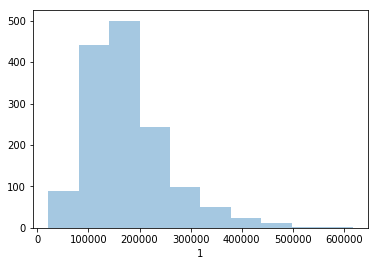

In [0]:

predict_test_input_fn = lambda: my_input_fn1(
      data_feature_t, 
 #     test_targets["SalePrice"], 
      num_epochs=1, 
      shuffle=False)

testpf = linear_regressor.predict(input_fn=predict_test_input_fn)
#print(type(test_predictions),list(test_predictions),type(list(test_predictions)))
testpf =([item['predictions'][0] for item in testpf])
#print(test_predictions)
main =[]
k=1461
for i in range(len(testpf)):
  l=[k+i,testpf[i]*100]
  main.append(l)
df = pd.DataFrame(main)
sns.distplot(df[1], bins=10, kde=False)
df.to_csv('/content/drive/My Drive/House Price Prediction/submission_DNN_Regressor_2.csv', index=False)
#print(len(main))
# df = pd.DataFrame(main)
#main_np = np.array(main)
#pd.DataFrame(main_np).to_csv("/content/drive/My Drive/House Price Prediction/submission.csv")
#print(main_np)
#root_mean_squared_error = math.sqrt(
    #metrics.mean_squared_error(test_predictions, test_targets))

#print("Final RMSE (on test data): %0.2f" % root_mean_squared_error)